Importación de librerias

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lectura del dataset

In [346]:
df = pd.read_csv("data\saudi-pro-league-transfers.csv")

In [347]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7755 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   fee_cleaned         2374 non-null   float64
 9   league_name         7858 non-null   object 
 10  year                7858 non-null   int64  
 11  season              7858 non-null   object 
 12  country             7858 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 798.2+ KB


# Limpieza por columnas

### Club Name

Verificamos que no haya nombre de clubes mal escritos que aparezcan mas de una vez

In [349]:
team_list = df['club_name'].unique().tolist()

In [350]:
team_list.sort()

In [351]:
print(team_list)

['Abha Club', 'Al-Adalah FC', 'Al-Ahli SFC', 'Al-Ain FC', 'Al-Ansar', 'Al-Batin FC', 'Al-Ettifaq FC', 'Al-Faisaly FC', 'Al-Fateh SC', 'Al-Fayha FC', 'Al-Hazem SC', 'Al-Hilal SFC', 'Al-Nahdah FC', 'Al-Nassr FC', 'Al-Okhdood Club', 'Al-Orobah FC', 'Al-Qadsiah FC', 'Al-Raed SFC', 'Al-Riyadh SC', 'Al-Shabab FC', 'Al-Shoalah FC', 'Al-Taawoun FC', 'Al-Tai FC', 'Al-Watani', 'Al-Wehda FC', 'Damac FC', 'Hajer Club', 'Ittihad Club', 'Khaleej FC', 'Najran SC', 'Ohod Club']


In [352]:
len(df['club_name'].unique().tolist())

31

In [353]:
#df['club_name'] = df['club_name'].apply(str.lower)

### Player Name

Verificamos que la cantidad de nombre de jugadores, y que estos sean correctos.

In [354]:
player_list = df['player_name'].unique().tolist()

In [355]:
len(player_list)

2442

In [356]:
player_list.sort()
print(player_list)

['Aaron Boupendza', 'Abbas Al-Hassan', 'Abbas Shengeeti', 'Abdalaziz Al-Bhrany', 'Abdalellah Hawsawi', 'Abdallah Deeb', 'Abdallah Medwah', 'Abdallah Said', 'Abdalrazaq Hossin', 'Abdel Fadel Suanon', 'Abdelali Mhamdi', 'Abdelatif Al-Bahdari', 'Abdelaziz Ali Guechi', 'Abdelfatha Safi', 'Abdelfattah Safi', 'Abdelilah Hafidi', 'Abdelkader Bedrane', 'Abdelkader Oueslati', 'Abdelkarim Benhania', 'Abdelkarim Nafti', 'Abdellatif Jrindou', 'Abdelmalek Ziaya', 'Abdelmoumene Djabou', 'Abderrazak Hamdallah', 'Abdessamad Ouarrad', 'Abdo Al-Basisi', 'Abdoh Bernaoy', 'Abdoh Hakami', 'Abdoh Otayf', 'Abdoulaye Koffi', 'Abdoulaye Sané', 'Abduallah Al-Dosari', 'Abdul Aziz Al-Muqbali', 'Abdul Sallam Amur', 'Abdulah Al Mutairi', 'Abdulah Al-Bilady', 'Abdulah Al-Mutairi', 'Abdulah Awaji', 'Abdularahman Al-Hurib', 'Abdulaziz Abushqra', 'Abdulaziz Al Mohammad', 'Abdulaziz Al-Abduassalam', 'Abdulaziz Al-Alawi', 'Abdulaziz Al-Aryani', 'Abdulaziz Al-Azemi', 'Abdulaziz Al-Bishi', 'Abdulaziz Al-Dawsari', 'Abdulazi

In [357]:
#df['player_name'] = df['player_name'].apply(str.lower)

### Age

Rellenamos nulos con la mediana para no alterar la distribucion y convertimos la edad a int

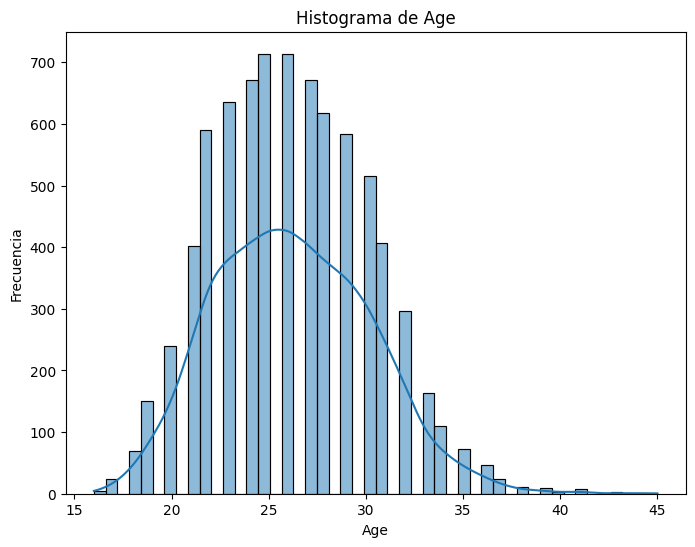

In [358]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df, x='age', kde=True)  # Creación del histograma
plt.title('Histograma de Age')  # Título del gráfico
plt.xlabel('Age')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

In [359]:
median = df['age'].median()
print(median)

26.0


In [360]:
df['age'] = df['age'].fillna(median)

In [361]:
df['age'].head()

0    18.0
1    27.0
2    26.0
3    37.0
4    29.0
Name: age, dtype: float64

In [362]:
df['age'] = df['age'].apply(int)

### Position

Cambiamos el nombre de la columna Position por Specific Position. El contenido de Position serán las 4 posiciones mas importantes y generales en el campo de juego. La información sale de la columna original.

In [363]:
df['position'].unique()

array(['Defensive Midfield', 'Centre-Forward', 'Right Winger',
       'Goalkeeper', 'Centre-Back', 'Attacking Midfield', 'Left Midfield',
       'Left Winger', 'Attack', 'Right Midfield', 'Midfield',
       'Central Midfield', 'Right-Back', 'Second Striker', 'Sweeper',
       'Defence', 'Left-Back'], dtype=object)

In [364]:
df['specific_position'] = df['position']

In [365]:
df['position'] = df['position'].replace('Defensive Midfield', 'Midfield')
df['position'] = df['position'].replace('Centre-Forward', 'Forward')
df['position'] = df['position'].replace('Right Winger', 'Forward')
df['position'] = df['position'].replace('Centre-Back', 'Defence')

In [366]:
df['position'] = df['position'].replace('Attacking Midfield', 'Midfield')
df['position'] = df['position'].replace('Left Midfield', 'Midfield')
df['position'] = df['position'].replace('Left Winger', 'Forward')
df['position'] = df['position'].replace('Attack', 'Forward')
df['position'] = df['position'].replace('Right Midfield', 'Midfield')
df['position'] = df['position'].replace('Central Midfield', 'Midfield')
df['position'] = df['position'].replace('Right-Back', 'Defence')
df['position'] = df['position'].replace('Second Striker', 'Forward')
df['position'] = df['position'].replace('Sweeper', 'Defence')
df['position'] = df['position'].replace('Left-Back', 'Defence')

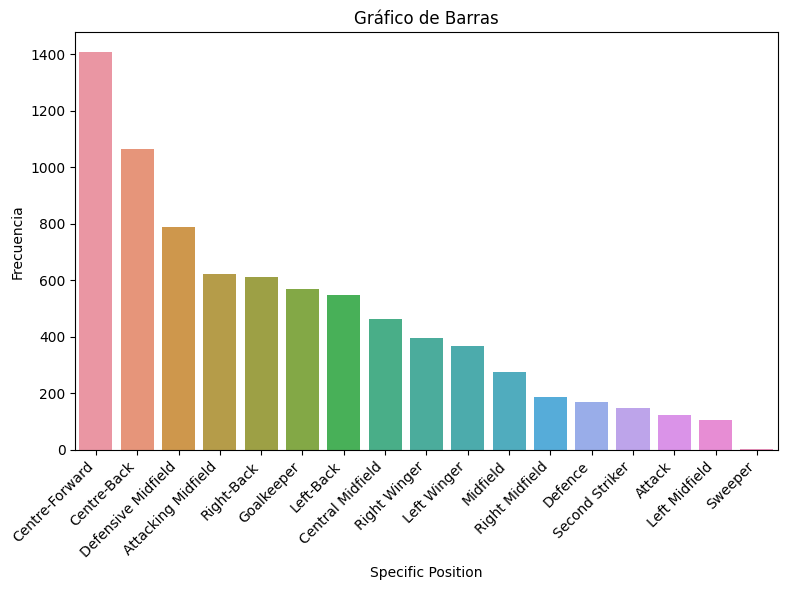

In [367]:
# Crear el gráfico de barras Specific Position
frecuencia = df["specific_position"].value_counts()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Specific Position')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.tight_layout()
plt.show()  # Mostrar el gráfico

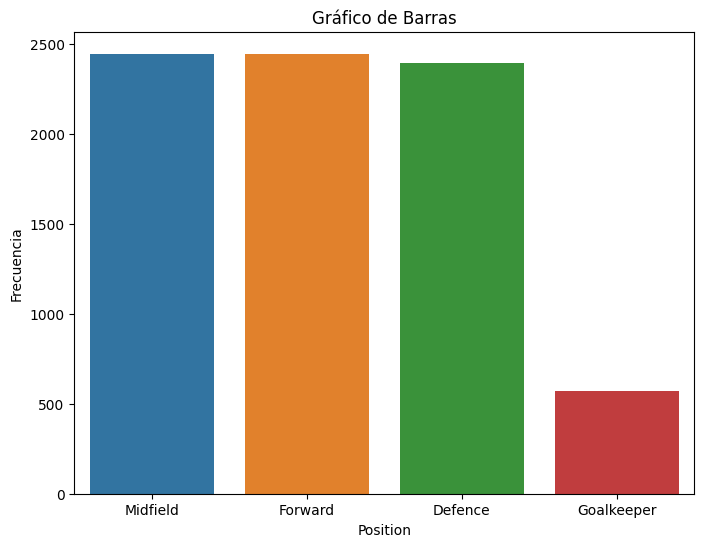

In [368]:
# Crear el gráfico de barras Position
frecuencia = df["position"].value_counts()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Position')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

### Club Involved

Identificamos, corregimos y unificamos nombres de los clubes. Si estaba mal escrito, o era una variante del mismo club, se unifico en un solo nombre. Esto incrementa la calidad del dato, permitiendo un analisis mas exacto y representativo.

In [369]:
# Crear un diccionario de mapeo de nombres de clubes
club_mapping = {
    'Al-Ahli': 'Al-Ahli SC',
    'Abha': 'Abha Club',
    'Al-Batin': 'Al-Batin',
    'Al-Ettifaq': 'Al-Ettifaq',
    'Al-Faisaly U23': 'Al-Faisaly FC',
    'Al-Fateh': 'Al-Fateh',
    'Al-Fayha': 'Al-Fayha FC',
    'Al-Gharafa': 'Al-Gharafa SC',
    'Al-Hilal': 'Al-Hilal FC',
    'Al-Jazeera Club': 'Al-Jazira Sporting Club',
    'Al-Jazira': 'Al-Jazira Sporting Club',
    'Al-Nassr': 'Al-Nasr SC',
    'Al-Nasr': 'Al-Nasr SC',
    'Al-Qadsiah': 'Al-Qadsiah FC',
    'Al-Raed': 'Al-Raed',
    'Al-Riyadh': 'Al-Riyadh SC',
    'Al-Shaab': 'Al-Shabab SC',
    'Al-Shabab': 'Al-Shabab SC',
    'Al-Shoalah U23': 'Al-Shoalah',
    'Al-Taawoun': 'Al-Taawoun',
    'Al-Tai': 'Al-Tai',
    'Al-Wehda': 'Al-Wehda',
    'Damac': 'Damac FC',
    'Ittihad C. U23': 'Ittihad Club'
}

# Función para aplicar el reemplazo con coincidencia parcial
def replace_club_name(name):
    for key in club_mapping.keys():
        if key in name:
            return club_mapping[key]
    return name

# Aplicar la función para reemplazar los nombres de clubes
df['club_involved_name'] = df['club_involved_name'].apply(replace_club_name)

# Ahora df['club_involved_name'] tiene los nombres de clubes reemplazados


In [370]:
club_involved_list = df['club_involved_name'].unique().tolist()
club_involved_list.sort()
print(club_involved_list)

["1.FC K'lautern", '1.FSV Mainz 05', '3 de Febrero', 'A. Baghdad SC', 'ABC FC', 'AC Ajaccio', 'AC Bellinzona', 'AC Milan', 'AC Tripoli', 'ACS Poli', 'ACSM Poli Iasi', 'ADI Metapán', 'AE Kifisias', 'AEK Athens', 'AFAD Djékanou', 'AFC Eskilstuna', 'AIK', 'AJ Auxerre', 'AO Xanthi', 'AOK Kerkyra', 'APOEL Nicosia', 'AS Gabès', 'AS Livorno', 'AS Lyon-Duchère', 'AS Marsa', 'AS Nancy', 'AS Roma', 'AS Saint-Priest', 'AS Vita Club', 'ASA', 'ASC Yakaar', 'ATK Mohun Bagan', 'Aalborg BK', 'Aarhus GF', 'Abha Club', 'Adana Demirspor', 'Adelaide United', 'Africa Sports', 'Ajax', 'Ajax Cape Town', 'Ajman Club', 'Akhmat Grozny', 'Aktobe', 'Al-Adalah', 'Al-Ahed', 'Al-Ahli SC', 'Al-Ain FC', 'Al-Ansar', 'Al-Anwar Club', 'Al-Arabi Irbid', 'Al-Arabi SC', 'Al-Batin', 'Al-Bukiryah FC', 'Al-Dhafra FC', 'Al-Dhaid', 'Al-Diraiyah FC', 'Al-Ettifaq', 'Al-Faisaly FC', 'Al-Faisaly SC', 'Al-Fateh', 'Al-Fayha FC', 'Al-Gharafa SC', 'Al-Hamriyah', 'Al-Hazem', 'Al-Hilal FC', 'Al-Hussein SC', 'Al-Ittifaq FC', 'Al-Jabalain',

In [371]:
len(club_involved_list)

935

### Fee

In [372]:
fee_list = df['fee'].unique().tolist()
print(fee_list)

['?', 'loan transfer', '-', '€2.00m', 'free transfer', 'End of loanJun 30, 2000', 'End of loanJan 30, 2001', 'Loan fee:€19k', '€50k', 'End of loanDec 31, 2000', 'End of loanJun 30, 2001', 'End of loanDec 31, 2001', 'End of loanMay 1, 2003', '€170k', '€1.10m', 'End of loanJun 30, 2003', '€500k', 'End of loanAug 1, 2003', 'End of loanJun 22, 2003', 'End of loanJun 30, 2004', '€400k', 'Loan fee:€150k', 'End of loanDec 1, 2004', 'End of loanMar 30, 2005', '€6.00m', 'End of loanMay 1, 2006', '€4.50m', 'End of loanJul 1, 2005', '€250k', 'End of loanJun 30, 2005', '€1.00m', 'Loan fee:€700k', 'End of loanDec 1, 2005', '€75k', 'End of loanJun 30, 2006', '€160k', '€2.50m', 'End of loanJun 1, 2006', '€1.20m', 'Loan fee:€200k', 'End of loanDec 31, 2006', 'End of loanApr 1, 2007', '€600k', 'End of loanDec 1, 2006', '€9.00m', '€200k', 'End of loanJun 30, 2007', 'End of loanJun 1, 2007', '€2.57m', '€732k', 'End of loanMay 1, 2008', '€900k', 'End of loanDec 1, 2007', 'End of loanMar 1, 2008', 'End of 

In [373]:
df['fee'] = df['fee'].fillna('-')

In [374]:
df[df['fee']=="-"].shape[0]

952

In [375]:
df[df['fee']=="?"].shape[0]

2416

In [376]:
df['fee'] = df['fee'].replace('?','-')

In [377]:
# Verificar si 'Retired' está en la columna 'club_involved_name' y actualizar las columnas 'type_operation' y 'fee'
df.loc[df['club_involved_name'] == 'Retired', ['type_operation', 'fee']] = ['retired', 'retired']

In [378]:
df['fee'] = df['fee'].apply(str.lower)

In [379]:
def get_type_operation(value):
    if 'loan' in value:
        return "loan"
    elif '€' in value:
        return "transfer"
    elif 'free' in value:
        return "free"
    elif 'retired' in value:
        return "retired"
    else:
        return "-"

In [380]:
df['type_operation'] = df['fee'].apply(get_type_operation)

In [381]:
df['type_operation'].unique().tolist()

['-', 'loan', 'retired', 'transfer', 'free']

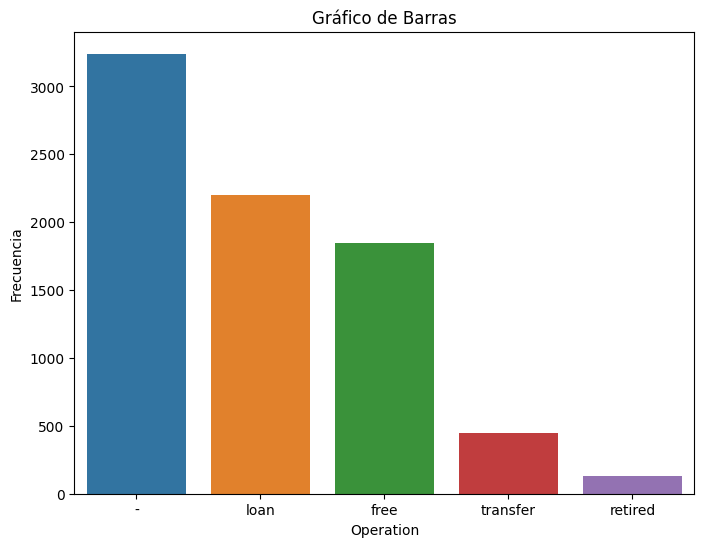

In [382]:
# Crear el gráfico de barras Position
frecuencia = df["type_operation"].value_counts()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Operation')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

### Fee Cleaned

Rellenamos nulos con 0 para poder graficar

In [383]:
#df['fee_cleaned'] = df['fee_cleaned'].fillna(0)

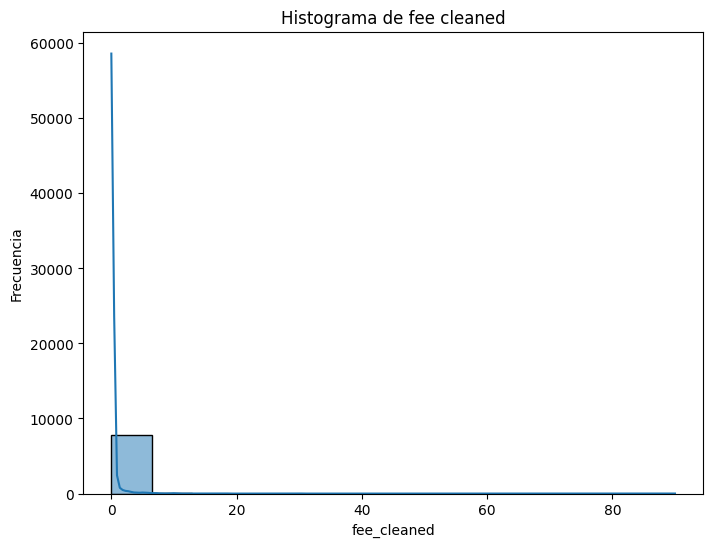

In [384]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df, x='fee_cleaned', kde=True)  # Creación del histograma
plt.title('Histograma de fee cleaned')  # Título del gráfico
plt.xlabel('fee_cleaned')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

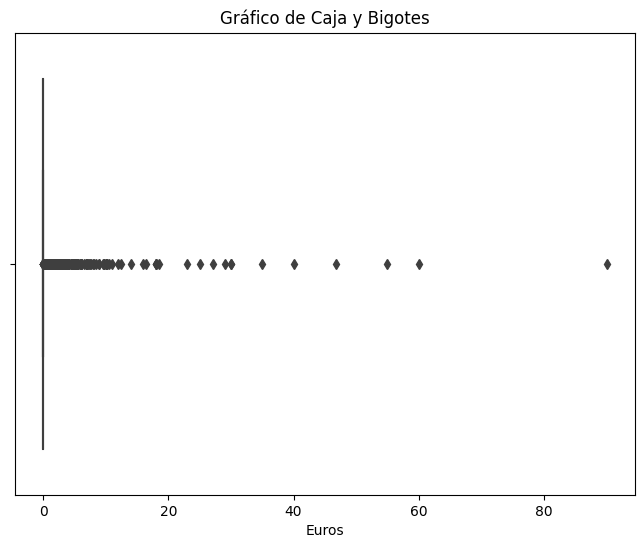

In [385]:
# Creamos el gráfico de caja y bigotes
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df['fee_cleaned'])  # Creación del gráfico de caja y bigotes
plt.title('Gráfico de Caja y Bigotes')  # Título del gráfico
plt.xlabel('Euros')  # Etiqueta del eje x
#plt.xlim(0, 100000000)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico

Multiplicamos los valores ya que estan abreviados

In [386]:
df['fee_cleaned'] = df['fee_cleaned']*1000000

Obtenemos la mediana para reemplazar en los nulos

In [387]:
mean = df['fee_cleaned'][df['type_operation']=='transfer'].mean()
median_transfer = df['fee_cleaned'][df['type_operation']=='transfer'].median()
mode = df['fee_cleaned'][df['type_operation']=='transfer'].mode()
print('Media: ', mean)
print('Mediana: ', median)
print('Moda: ', mode)

Media:  3356959.6412556055
Mediana:  26.0
Moda:  0    1000000.0
Name: fee_cleaned, dtype: float64


In [388]:
def get_median_transfer(value):
    if '-' == value:
        return median_transfer

In [389]:
df['fee_cleaned'] = df['type_operation'].apply(get_median_transfer)

Reemplazamos desconocidos por la mediana

In [390]:
df['fee'] = df['fee'].replace('-', 'transfer')

In [391]:
df['type_operation'] = df['type_operation'].replace('-', 'transfer')

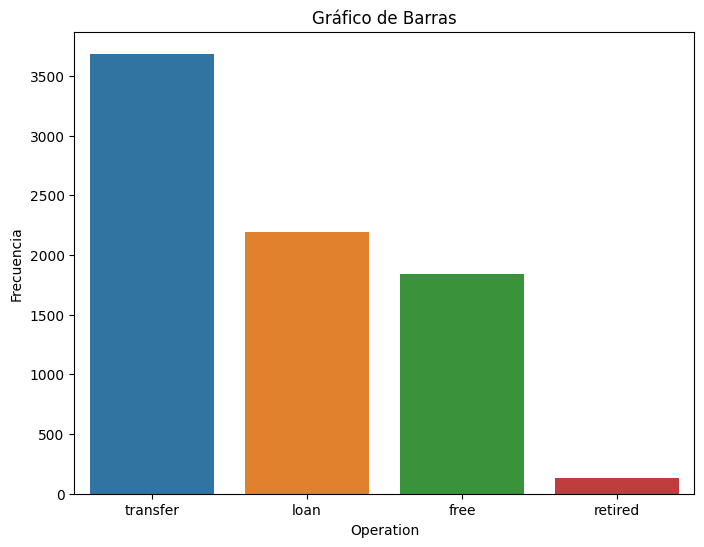

In [392]:
# Crear el gráfico de barras Position
frecuencia = df["type_operation"].value_counts()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Operation')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

### Transfer Movement

In [393]:
df['transfer_movement'].unique()

array(['in', 'out'], dtype=object)

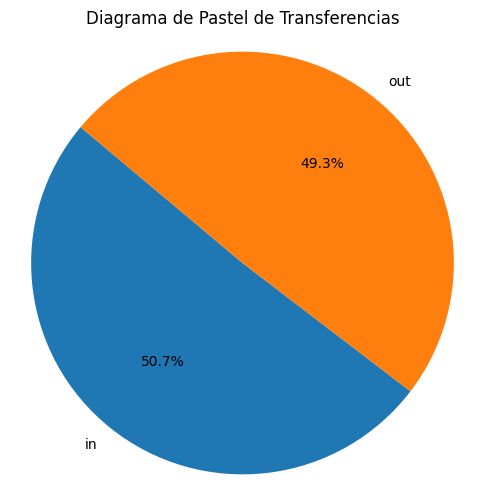

In [394]:
conteo = df['transfer_movement'].value_counts()

# Crear un diagrama de pastel
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)  # Crear el diagrama de pastel

plt.title('Diagrama de Pastel de Transferencias')  # Título del gráfico

# Mostrar el diagrama de pastel
plt.axis('equal')  # Para asegurarse de que el gráfico sea circular
plt.show()

### Transfer Period

In [395]:
df['transfer_period'].unique()

array(['Summer', 'Winter'], dtype=object)

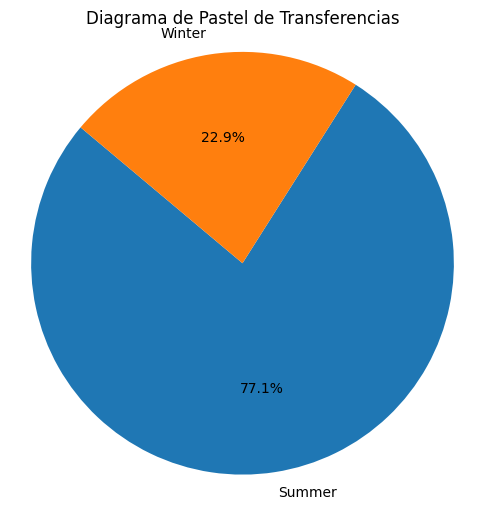

In [396]:
conteo = df['transfer_period'].value_counts()

# Crear un diagrama de pastel
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)  # Crear el diagrama de pastel

plt.title('Diagrama de Pastel de Transferencias')  # Título del gráfico

# Mostrar el diagrama de pastel
plt.axis('equal')  # Para asegurarse de que el gráfico sea circular
plt.show()

### League name

In [397]:
df['league_name'].unique()

array(['Saudi Professional League'], dtype=object)

Eliminamos la columna porque contiene un solo valor

In [398]:
df = df.drop('league_name', axis=1)

#### Year

In [399]:
df['year'] = df['year'].apply(str)

In [400]:
df['year'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

### Season

In [401]:
df['season']

0       2000/2001
1       2000/2001
2       2000/2001
3       2000/2001
4       2000/2001
          ...    
7853    2024/2025
7854    2024/2025
7855    2024/2025
7856    2024/2025
7857    2024/2025
Name: season, Length: 7858, dtype: object

### Country

In [402]:
df['country'].unique()

array(['Saudi Arabia'], dtype=object)

Eliminamos la columna porque contiene un solo valor.

In [403]:
df = df.drop('country', axis=1)

## Detalles

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7858 non-null   int64  
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7858 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   fee_cleaned         3241 non-null   float64
 9   year                7858 non-null   object 
 10  season              7858 non-null   object 
 11  specific_position   7858 non-null   object 
 12  type_operation      7858 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 798.2+ KB


Ordenamos las columnas

In [405]:
column_order = ["club_name", "player_name", "age", "position", "specific_position", "club_involved_name", "fee", "type_operation", "fee_cleaned", "year", "season"]    
df = df[column_order]

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7858 non-null   int64  
 3   position            7858 non-null   object 
 4   specific_position   7858 non-null   object 
 5   club_involved_name  7858 non-null   object 
 6   fee                 7858 non-null   object 
 7   type_operation      7858 non-null   object 
 8   fee_cleaned         3241 non-null   float64
 9   year                7858 non-null   object 
 10  season              7858 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 675.4+ KB


In [409]:
df.tail(100)

,club_name,player_name,age,position,specific_position,club_involved_name,fee,type_operation,fee_cleaned,year,season
7758,Al-Raed SFC,Damjan Djokovic,33,Midfield,Central Midfield,FCSB,free transfer,free,NaN,2023,2023/2024
7759,Al-Raed SFC,Abdulmalik Al-Shammari,27,Defence,Left-Back,Al-Taawoun,transfer,transfer,1300000.0,2023,2023/2024
7760,Al-Raed SFC,Alexandru Mitrita,28,Forward,Left Winger,New York City,"end of loanjun 30, 2023",loan,NaN,2023,2023/2024
7761,Al-Ettifaq FC,Jordan Henderson,33,Midfield,Central Midfield,Liverpool,€14.00m,transfer,NaN,2023,2023/2024
7762,Al-Ettifaq FC,Jack Hendry,28,Defence,Centre-Back,Club Brugge,€5.00m,transfer,NaN,2023,2023/2024
...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27,Midfield,Defensive Midfield,FC Porto,"end of loanjun 30, 2024",loan,NaN,2024,2024/2025
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23,Forward,Centre-Forward,Al-Safa,"end of loanjun 30, 2024",loan,NaN,2024,2024/2025
7855,Al-Taawoun FC,Flávio,28,Midfield,Central Midfield,Trabzonspor,"end of loanjun 30, 2024",loan,NaN,2024,2024/2025
7856,Al-Taawoun FC,Muath Faquihi,22,Defence,Left-Back,Al-Hilal FC,"end of loanjun 30, 2024",loan,NaN,2024,2024/2025
